# Problem Statement 
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

Essentially The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the CarPrice  dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


In [2]:
CarPrice = pd.read_csv("C:\ML_assignment\CarPrice_Assignment.csv")

In [3]:
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the housing dataframe

In [4]:
CarPrice.shape

(205, 26)

In [5]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Splitting the CarName field to consider only company name as the independent variable for model building

In [7]:
CarPrice["CarName"]= CarPrice["CarName"].str.split(" ", n = 1, expand = True) 
CarPrice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


## Step 2: Visualising the Data

the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

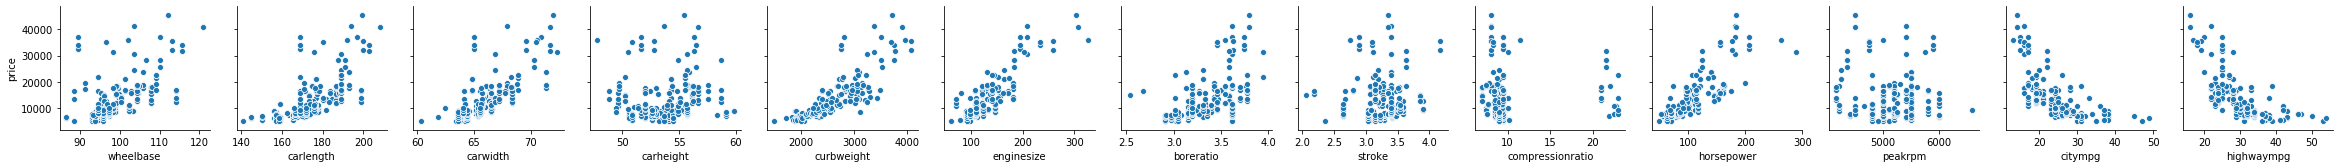

In [9]:
sns.pairplot(CarPrice, x_vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'], y_vars='price')
plt.show()

In [10]:
#sns.pairplot(CarPrice)
#plt.show()

#### Visualising Categorical Variables

there are a few categorical variables as well. Let's make a boxplot for some of these variables.

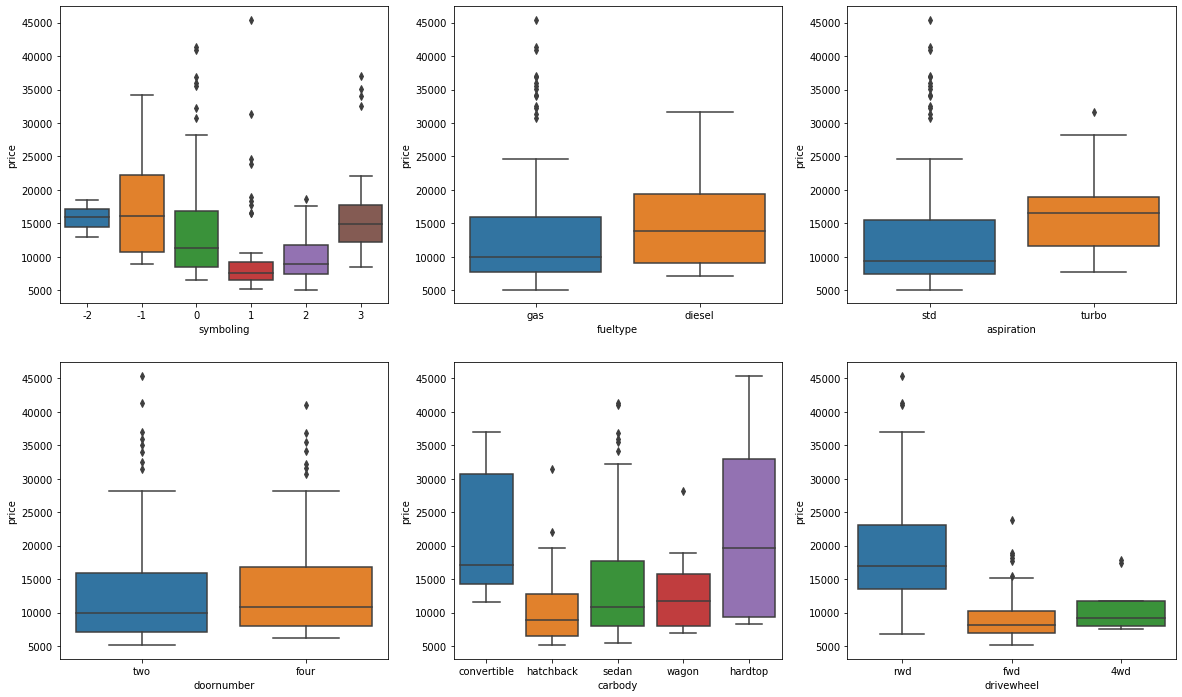

In [11]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = CarPrice)
plt.subplot(2,3,2)
#sns.boxplot(x = 'CarName', y = 'price', data = CarPrice)
#plt.subplot(2,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)

plt.show()

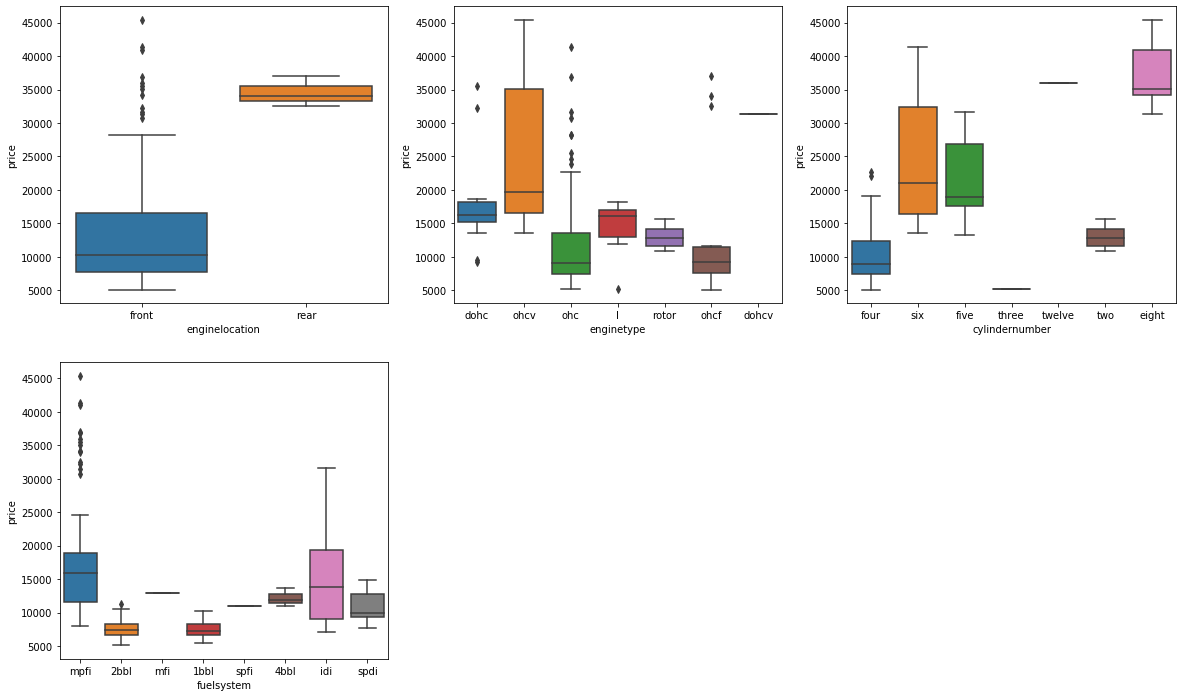

In [12]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(2,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.subplot(2,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.subplot(2,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.show()
#plt.subplot(2,3,11)

## Step 3: Data Preparation

- dataset has many columns with values as 'Yes' or 'No' types.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s

In [13]:
# List of variables to map

varlist =  ['fueltype']

# Defining the map function
def binary_map(x):
    return x.map({'gas': 1, "diesel": 0})

# Applying the function to the housing list
CarPrice[varlist] = CarPrice[varlist].apply(binary_map)


In [14]:
varlist =  ['aspiration']

# Defining the map function
def binary_map(x):
    return x.map({'std': 1, "turbo": 0})

# Applying the function to the housing list
CarPrice[varlist] = CarPrice[varlist].apply(binary_map)


In [15]:
varlist =  ['doornumber']

# Defining the map function
def binary_map(x):
    return x.map({'two': 1, "four": 0})

# Applying the function to the housing list
CarPrice[varlist] = CarPrice[varlist].apply(binary_map)


In [16]:
varlist =  ['enginelocation']

# Defining the map function
def binary_map(x):
    return x.map({'front': 1, "rear": 0})

# Applying the function to the housing list
CarPrice[varlist] = CarPrice[varlist].apply(binary_map)


In [17]:
CarPrice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero,1,1,1,hatchback,rwd,1,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi,1,1,0,sedan,fwd,1,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi,1,1,0,sedan,4wd,1,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi,1,1,1,sedan,fwd,1,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi,1,1,0,sedan,fwd,1,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi,1,1,0,wagon,fwd,1,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi,1,0,0,sedan,fwd,1,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi,1,0,1,hatchback,4wd,1,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


### Dummy Variables

The variables ('carbody', 'symboling', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'symboling') has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [18]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'

#df_cylindernumber = pd.get_dummies(CarPrice['cylindernumber'], drop_first = True)
#df_drivewheel = pd.get_dummies(CarPrice['drivewheel'], drop_first = True)
#df_symboling = pd.get_dummies(CarPrice['symboling'], drop_first = True)
#df_carbody = pd.get_dummies(CarPrice['carbody'], drop_first = True)
#df_enginetype = pd.get_dummies(CarPrice['enginetype'], drop_first = True)
#df_fuelsystem = pd.get_dummies(CarPrice['fuelsystem'], drop_first = True)

In [19]:
# Add the results to the original housing dataframe

#CarPrice = pd.concat([CarPrice, df_cylindernumber, df_drivewheel, df_symboling, df_carbody, df_enginetype, df_fuelsystem], axis = 1)

In [20]:
#CarPrice
#CarPrice.columns

In [21]:
CarPrice = pd.get_dummies(CarPrice)

In [22]:
CarPrice

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,1,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,4,2,1,1,0,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,0,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0
5,6,2,1,1,1,1,99.8,177.3,66.3,53.1,...,0,0,0,0,0,0,0,1,0,0
6,7,1,1,1,0,1,105.8,192.7,71.4,55.7,...,0,0,0,0,0,0,0,1,0,0
7,8,1,1,1,0,1,105.8,192.7,71.4,55.7,...,0,0,0,0,0,0,0,1,0,0
8,9,1,1,0,0,1,105.8,192.7,71.4,55.9,...,0,0,0,0,0,0,0,1,0,0
9,10,0,1,0,1,1,99.5,178.2,67.9,52.0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [23]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features using  MinMax scaling.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio',
           'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,1,1,1,0,1,0.244828,0.426016,0.291667,0.265487,...,0,0,0,1,0,0,0,0,0,0
125,126,3,1,1,1,1,0.272414,0.452033,0.666667,0.212389,...,0,0,0,0,0,0,0,1,0,0
166,167,1,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,1,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,1,0,0
199,200,-1,1,0,0,1,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df_train.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,98.524476,0.797203,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.461655,0.509004,...,0.006993,0.027972,0.055944,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,58.977655,1.195999,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,...,0.083624,0.165472,0.230621,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,48.500000,0.000000,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,97.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,147.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,205.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


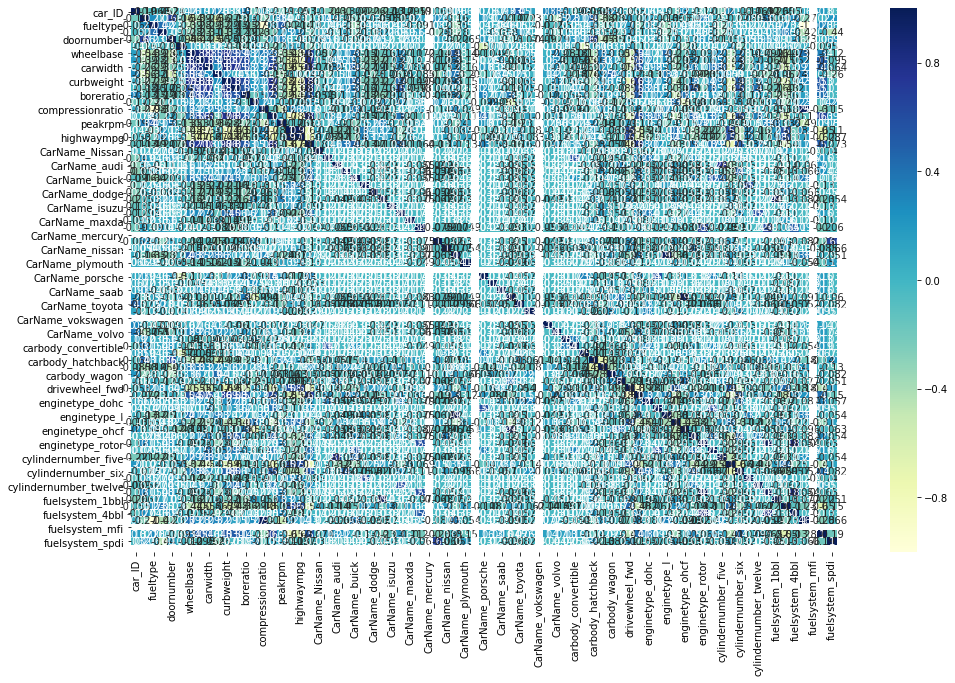

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('price')
X_train = df_train

### Adding all the variables to the model

In [33]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                    0.029101
car_ID                   0.002653
symboling               -0.000619
fueltype                -0.116828
aspiration              -0.082863
doornumber              -0.010083
enginelocation          -0.179881
wheelbase                0.163747
carlength               -0.157507
carwidth                 0.245349
carheight               -0.127726
curbweight               0.325348
enginesize               2.214031
boreratio               -0.695592
stroke                  -0.241107
compressionratio        -0.363383
horsepower              -0.251269
peakrpm                  0.194819
citympg                 -0.044166
highwaympg               0.125303
CarName_Nissan          -0.003135
CarName_alfa-romero      0.222804
CarName_audi             0.293382
CarName_bmw              0.558849
CarName_buick            0.123730
CarName_chevrolet        0.111767
CarName_dodge            0.050371
CarName_honda            0.059786
CarName_isuzu            0.104809
CarName_jaguar

In [34]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     51.62
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           8.26e-46
Time:                        23:47:16   Log-Likelihood:                 282.47
No. Observations:                 143   AIC:                            -438.9
Df Residuals:                      80   BIC:                            -252.3
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [35]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
38,CarName_renault,inf
49,carbody_hatchback,inf
55,enginetype_dohc,inf
54,drivewheel_rwd,inf
53,drivewheel_fwd,inf
52,drivewheel_4wd,inf
51,carbody_wagon,inf
50,carbody_sedan,inf
48,carbody_hardtop,inf
57,enginetype_l,inf


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 'doornumber','citympg','fwd','rwd','2','wagon','l','ohcf','2bbl','CarName_Nissan','CarName_dodge','CarName_honda','CarName_jaguar','CarName_nissan','CarName_volvo','carbody_wagon','drivewheel_4wd','drivewheel_fwd','drivewheel_rwd','enginetype_l','enginetype_ohcf','fuelsystem_2bbl','fuelsystem_2bbl','fuelsystem_spdi'   as it has a very high p-value of `0.938`. Let's go ahead and drop this variables

In [37]:
X = X_train.drop('doornumber', 1,)
X = X_train.drop('citympg', 1,)
X = X_train.drop('CarName_Nissan', 1,)
X = X_train.drop('CarName_dodge', 1,)
X = X_train.drop('CarName_honda', 1,)
X = X_train.drop('CarName_jaguar', 1,)
X = X_train.drop('CarName_nissan', 1,)
X = X_train.drop('CarName_volvo', 1,)

X = X_train.drop('carbody_wagon', 1,)
X = X_train.drop('drivewheel_4wd', 1,)
X = X_train.drop('drivewheel_fwd', 1,)
X = X_train.drop('drivewheel_rwd', 1,)
X = X_train.drop('drivewheel_fwd', 1,)
X = X_train.drop('enginetype_l', 1,)
X = X_train.drop('enginetype_ohcf', 1,)
X = X_train.drop('fuelsystem_2bbl', 1,)
X = X_train.drop('fuelsystem_spdi', 1,)


In [38]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [39]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     51.62
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           8.26e-46
Time:                        23:47:29   Log-Likelihood:                 282.47
No. Observations:                 143   AIC:                            -438.9
Df Residuals:                      80   BIC:                            -252.3
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

In [40]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
37,CarName_porsche,inf
39,CarName_saab,inf
27,CarName_isuzu,inf
28,CarName_jaguar,inf
29,CarName_maxda,inf
30,CarName_mazda,inf
32,CarName_mitsubishi,inf
33,CarName_nissan,inf
34,CarName_peugeot,inf
35,CarName_plymouth,inf
